    media_notas  frequencia  trabalhos_entregues  resultado_calculo  aprovado
0      9.892033   29.492955                    1           6.030805         0
1      4.561662   61.673141                    5           5.131025         0
2      5.109478   46.784623                    5           4.958278         0
3      7.926598   25.533891                    3           5.329316         0
4      7.546302   83.899589                    0           6.290139         0
5     19.931485   17.861920                    2          10.901600         1
6      8.163944   22.711417                    0           4.763315         0
7     15.437880   65.987645                    0           9.698569         0
8     15.210734   47.911625                    3           9.642716         0
9      6.200187    7.344734                    4           4.120436         0
10     6.930824   13.896007                    2           4.282292         0
11     7.035296   11.230718                    5           4.854

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7000 - loss: 0.5376

Taxa de acerto no teste: 70.00%


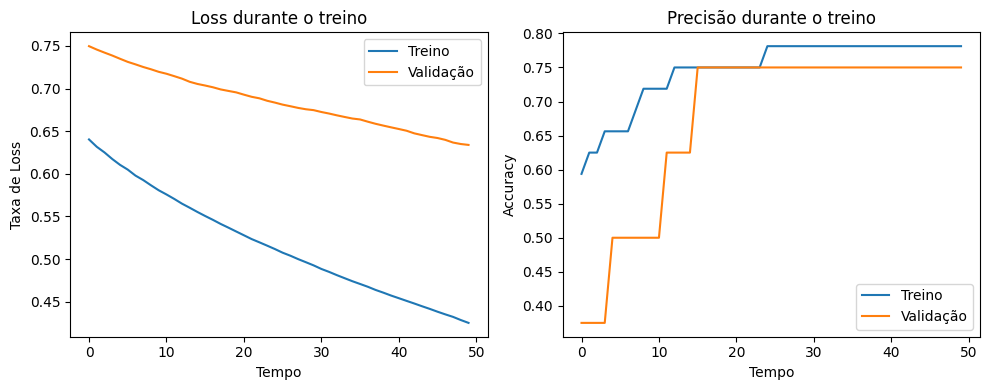

In [ ]:
# Mário Armando Jr | 3P6LDS1 | IA
# Trabalho: Previsão de Aproveitamento Escolar
# Objectivo: Classificação do estudande ( 1 -aprovado ou  0 -reprovado)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


np.random.seed(50)

# Criar 50 estudantes ficticios, com uma media de 0-20, uma freq de presença de 0 a 100, e hora de estudo de 0 a 30
data = pd.DataFrame({
    'media_notas': np.random.uniform(0, 20, 50),
    'frequencia': np.random.uniform(0, 100, 50),
    'trabalhos_entregues': np.random.randint(0, 6, 50)
})


data['resultado_calculo'] = (
    0.5*data['media_notas'] +
    0.3*data['frequencia']/10 +
    0.2*data['trabalhos_entregues']
)


data['aprovado'] = (data['resultado_calculo'] > 10).astype(int)
print(data)



X = data[['media_notas', 'frequencia', 'trabalhos_entregues']]
y = data['aprovado']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(8, input_dim=3, activation='relu'))  # camada com 8 neuronio com activacao relu pois é ideal para aprender em camadas escondidas
model.add(Dense(1, activation='sigmoid'))            # saída com activacao sigmoide pois retorna valores entre 0 e 1


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#adam é um modelo eficaz para eficaz para actualização de pesos; binary_crossentropy é usado para medir o quaão diferente está a previsão do valor real


history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2, verbose=0)


loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTaxa de acerto no teste: {accuracy*100:.2f}%")


plt.figure(figsize=(10,4))

#loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss durante o treino')
plt.xlabel('Tempo')
plt.ylabel('Taxa de Loss')
plt.legend()

# Precisão (Accuracy)
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Precisão durante o treino')
plt.xlabel('Tempo')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
